In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
res = requests.get(
    'https://en.wikipedia.org/wiki/2020_United_States_census#State_rankings')


In [3]:
a = pd.read_html(res.content)[2][['State', 'Population (2020)[86]']]
a['state'] = [s.upper().replace(" ", '') for s in a['State']]
a['population'] = a['Population (2020)[86]']
a = a[['state', 'population']]
a['letters'] = [len(s) for s in a['state']]
a['efficiency'] = a['population'] / a['letters']
a = a.drop(51)
a = a.drop(4)
# a = a.drop(0)
a = a.drop(8)
a = a.drop(14)
a

,state,population,letters,efficiency
0,CALIFORNIA,39538223,10,3.953822e+06
1,TEXAS,29145505,5,5.829101e+06
2,FLORIDA,21538187,7,3.076884e+06
3,NEWYORK,20201249,7,2.885893e+06
5,ILLINOIS,12812508,8,1.601564e+06
6,OHIO,11799448,4,2.949862e+06
7,GEORGIA,10711908,7,1.530273e+06
9,MICHIGAN,10077331,8,1.259666e+06
10,NEWJERSEY,9288994,9,1.032110e+06
11,VIRGINIA,8631393,8,1.078924e+06


In [4]:
MIN_SCORE = 165379868

In [5]:
sum(a['population'][:14])

202297897

In [6]:

grid_example = np.array([
    ['T', "H", "O"],
    ["A", "I", "N"],
    ["E", "S", "L"],
])

grid = np.array([
    ['', '', '', '', ''],
    ["", "", "", "", ""],
    ["", "", "", "", ""],
    ["", "", "", "", ""],
    ["", "", "", "", ""],
])

letters = [a for a in 'abcdefghijklmnopqrstuvwxyz'.upper()]

In [28]:
def neighbours(x,y,N):
    return [(i+x,j+y) for i,j in [(-1,0),(0,-1),(1,0),(0,1), (1,1),(-1,-1),(1,-1),(-1,1)] if i+x >=0 and i+x <N[0] and j+y >=0 and j+y <N[1]]

def state_in_grid(grid, state, start=None, altered=False):
    if sum(1 for s in state if s not in grid) > 1 and not altered:
        return False
    if len(state) == 1:
        if state == grid[start]:
            return True
        elif state != grid[start] and not altered:
            return True
        else:
            return False
    if start:
        starts = [start]
    elif state[0] not in grid and not altered:
        starts = [(i,j) for i in range(grid.shape[0]) for j in range(grid.shape[1])]
        altered = True
    else:
        starts = np.asarray(np.where(grid == state[0])).T.tolist()
    for start in starts:
        for neigh in neighbours(*start, grid.shape):
            if grid[neigh] == state[1]:
                if state_in_grid(grid, state[1:], neigh, altered):
                    return True
            elif grid[neigh] != state[1] and not altered:
                if state_in_grid(grid, state[1:], neigh, True):
                    return True
    return False


def grid_score(grid):
    s = 0
    c = 0
    for idx, row in a.iterrows():
        state = row['state']
        if state_in_grid(grid, state):
            s += row['population']
            c += 1
            # print(f"- {state} -", f"{row['population']:,}")
    return s, c
    


In [8]:
def place_state(start, state, ogrid, N, altered=False):  
    grid = ogrid.copy()
    if len(state) == 1:
        if state == grid[start]:
            yield grid
        elif state != grid[start] and not altered:
            yield grid
        return
    
    for n in neighbours(*start, N):
        if state[1] == grid[n]:
            new_grid = grid.copy()
            new_grid[n] = state[1]
            yield from place_state(n, state[1:], new_grid, N, altered)
        else:
            if grid[n] == '':
                new_grid = grid.copy()
                new_grid[n] = state[1]
                yield from place_state(n, state[1:], new_grid, N, altered)
            elif not altered:
                new_grid = grid.copy()
                yield from place_state(n, state[1:], new_grid, N, True)


In [9]:
grid = np.array([
    ['', '', '', '', ''],
    ["", "", "", "", ""],
    ["", "", "", "", ""],
    ["", "", "", "", ""],
    ["", "", "", "", ""],
])

In [10]:
import itertools
def peek(iterable):
    try:
        first = next(iterable)
    except StopIteration:
        return None
    return first, itertools.chain([first], iterable)

In [39]:
best_score = 0
most_states = 0
best_grids = []

def dfs(grid, N, start_state, states, starts=None):
    global best_score, most_states, best_grids
    if len(states) <= 45:
        gs = grid_score(grid)
        best_grids.append(grid)
        if gs[0] > best_score:
            best_score = gs[0]
            print("High score:", best_score)
            print(grid)
        if gs[1] > most_states:
            most_states = gs[1]
            print("Most States:", most_states)
            print(grid)
        
    if len(states) < 2:
        return
    if state_in_grid(grid, start_state):
        if len(states) > 1:
            dfs(grid, N, states[0], states[1:])
        return
    
    all_starts = [(i,j) for i in range(N[0]) for j in range(N[1]) if grid[i,j] == start_state[0]] if not starts else starts
    all_starts += [(i, j) for i in range(N[0])
                   for j in range(N[1]) if grid[i, j] == '']

    for start in all_starts:
        g = grid.copy()
        if g[start] == "" or g[start] == start_state[0]:
            g[start] = start_state[0]
            placements = place_state(start, start_state, g, N)
        else:
            placements = place_state(start, start_state, g, N, True)
        if peek(placements) is not None:
            for placement in placements:
                dfs(placement, N, states[0], states[1:])
            
            

In [ ]:
dfs(grid, grid.shape, list(a['state'])[0], list(a['state'])[1:])
# ~15 mins for a good solution

In [42]:
# from dfs ^
basic_sol = np.array([['C', 'I', 'T', 'W', 'L'],
                ['A', 'F', 'X', 'E', 'I'],
                ['R', 'O', 'A', 'S', 'N'],
                ['N', 'A', 'R', 'I', 'O'],
                ['I', 'K', 'D', 'G', 'E']])

sol_20s = None
sol_200m = None
basic_sol

array([['C', 'I', 'T', 'W', 'L'],
       ['A', 'F', 'X', 'E', 'I'],
       ['R', 'O', 'A', 'S', 'N'],
       ['N', 'A', 'R', 'I', 'O'],
       ['I', 'K', 'D', 'G', 'E']], dtype='<U1')

In [43]:
"".join(basic_sol.flatten())

'CITWLAFXEIROASNNARIOIKDGE'

In [44]:
for i in range(5):
    for j in range(5):
        for letter in letters:
            g = basic_sol.copy()
            g[i,j] = letter
            gs = grid_score(g)
            if gs[1] > 19:
                sol_20s = g
            if gs[0] >= 200000000:
                sol_200m = g

In [45]:
print(sol_20s, sol_200m)

[['C' 'I' 'T' 'W' 'L']
 ['A' 'F' 'K' 'E' 'I']
 ['R' 'O' 'A' 'S' 'N']
 ['N' 'A' 'R' 'I' 'O']
 ['I' 'K' 'D' 'G' 'E']] None


In [46]:
print(grid_score(sol_20s))
", ".join([s for s in a['state'] if state_in_grid(sol_20s, s)])


(196587172, 20)


'CALIFORNIA, TEXAS, FLORIDA, NEWYORK, ILLINOIS, OHIO, GEORGIA, VIRGINIA, ARIZONA, INDIANA, WISCONSIN, OREGON, IOWA, NEVADA, ARKANSAS, KANSAS, NEBRASKA, IDAHO, MAINE, ALASKA'

In [47]:
"".join(sol_20s.flatten())

'CITWLAFKEIROASNNARIOIKDGE'

In [48]:
grid_score(np.reshape(list('CITWLAFKEIROASNNARIOIKDGE'), (5,5)))

(196587172, 20)

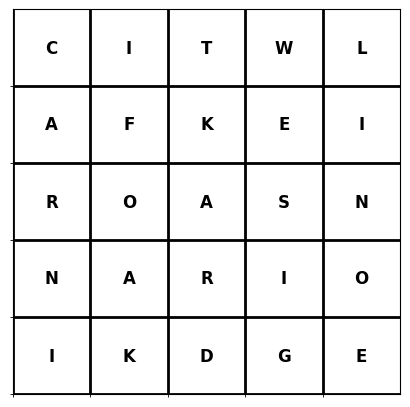

In [49]:
import matplotlib.pyplot as plt


def plot_grid(grid):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_xticks([x for x in range(5)], minor=True)
    ax.set_yticks([y for y in range(5)], minor=True)
    ax.grid(which='minor', color='k', linestyle='-', linewidth=2)

    for i in range(5):
        for j in range(5):
            ax.text(j + 0.5, 5 - i - 0.5, grid[i][j],
                    va='center', ha='center', fontdict={'weight': 'bold', 'size': 12})

    plt.savefig('solution.png')
    plt.show()

plot_grid(sol_20s)